In [1]:
#%matplotlib notebook
import sys
import os

# Standard modules used through the notebook 
import numpy as np
import matplotlib.pyplot as plt

# tools for applying bundle adjustment to a temporal sequence of satellite images
import bundle_adjust.ba_timeseries as ba_timeseries

# Display and interface settings (just for the notebook interface)
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(linewidth=150)

### Load scene

In [2]:
coal_loader = {'geotiff_dir': '/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images',
               's2p_configs_dir': '/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_s2p',
               'rpc_src': 's2p_configs',
               'cam_model': 'perspective',
               'output_dir': 'exp/coal',
               'ba_method': 'ba_global',
               'timeline_indices': '3',
               'reconstruct_scene': True,
               'aoi_geojson': None,
               'compute_aoi_masks': True,
               'use_aoi_masks_to_equalize_crops': False}

from bundle_adjust import data_loader
data_loader.save_dict_to_json(coal_loader, 'coal_ba_config.json')

In [3]:
scene = ba_timeseries.Scene('coal_ba_config.json')
scene.display_aoi()

#############################################################

Loading scene from coal_ba_config.json

-------------------------------------------------------------
Configuration:
    - images_dir:      /home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images
    - s2p_configs_dir: /home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_s2p
    - rpc_src:         s2p_configs
    - output_dir:      exp/coal
    - cam_model:       perspective
-------------------------------------------------------------

Defining aoi from s2p config.json files... 541 / 541 done

Number of acquisition dates: 85 (from 2019-06-08 to 2020-05-06)
Number of images: 560
The aoi covers a total of 1.03 squared km:

#############################################################




Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [ ]:
# save aoi
import pickle
pickle_out = open('exp/skysat_coal_singledate/aoi.pickle','wb')
pickle.dump(scene.aoi_lonlat, pickle_out)
pickle_out.close()

### Select date(s) of the scene to adjust

In [4]:
# 0, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16 contain no errors

timeline_indices = [0, 3, 6] #, 6]  #[0, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]

#timeline_indices =timeline_indices[:5]

scene.get_timeline_attributes(timeline_indices, ['datetime', 'n_images', 'id'])

index  |  datetime             |  n_images  |  id             
______________________________________________________________

0      |  2019-06-08 07:53:52  |  5         |  20190608_075352
3      |  2019-06-17 07:51:38  |  9         |  20190617_075138
6      |  2019-06-27 07:48:21  |  7         |  20190627_074821
______________________________________________________________

                                  21 total                    




In [ ]:
scene.tracks_config = {'s2p': False,
                       'matching_thr': 0.6,
                       'use_masks': False,
                       'filter_pairs': True,
                       'max_kp': 9000,
                       'optimal_subset': False,
                       'K': 30,
                       'continue': True,
                       'tie_points': False}

### Bundle Adjustment

Chosen 3 dates of the timeline to bundle adjust:
(1) 2019-06-08 07:53:52 --> 5 views
(2) 2019-06-17 07:51:38 --> 9 views
(3) 2019-06-27 07:48:21 --> 7 views



Running bundle ajustment sequentially, each date aligned with 1 previous date(s) !
Bundle adjusting date 2019-06-08 07:53:52...
No previously adjusted data was found in exp/coal

5 new images for bundle adjustment ! 

Loading 5 image rpcs / 5

Loading 5 image crops / 5


Bundle Adjustment input data is ready !

Bundle Adjustment Pipeline created
-------------------------------------------------------------
Configuration:
    - input_dir:    exp/coal/ba_sequential
    - output_dir:   exp/coal/ba_sequential
    - n_new:        5
    - n_adj:        0
    - cam_model:    perspective
-------------------------------------------------------------

Approx. rpcs as perspective projection matrices... 5 / 5


Estimating camera positions...
done!

Building feature tracks - satellite scenario - using opencv SIFT

Parameters:
      use_masks

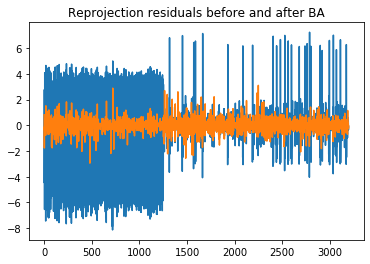

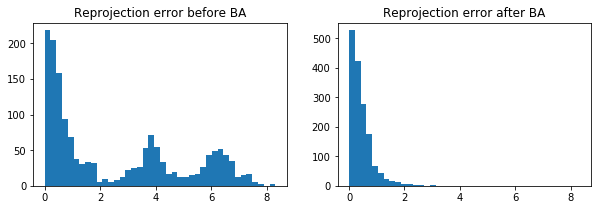

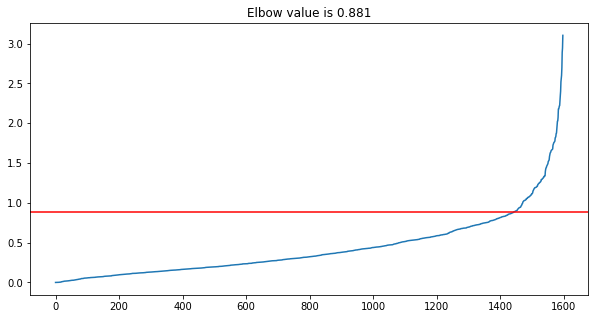


Removal of outliers according to reprojection error completed
Deleted 18 observations (1.13%) and 18 tracks (2.41%)
     - Obs per cam before : [289 323 213 315 458]
     - Obs per cam after  : [276 320 209 311 444]


Defining bundle adjustment parameters...
     - cam_params_to_optimize: ['R']

729 3d points, 0 fixed and 729 to be optimized
5 cameras, 0 fixed and 5 to be optimized
3 parameters to optimize per camera


Running bundle adjustment...
     - loss: linear
     - ftol: 0.0001
     - xtol: 1e-10

Shape of Jacobian sparsity: 3120x2202
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 4, initial cost 9.6620e+03, final cost 2.1312e+02, first-order optimality 3.39e+03.
Optimization took 0 seconds

Error before BA (mean / median): 2.55 / 1.28
Error after  BA (mean / median): 0.41 / 0.33


Bundle adjusted projection matrices successfully saved at exp/coal/ba_sequential/P_adj


Bundle adjusted RPCs successfully saved at exp/coal/ba_sequential/RPC_adj

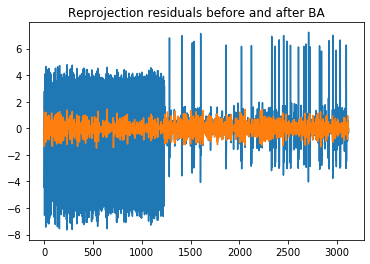

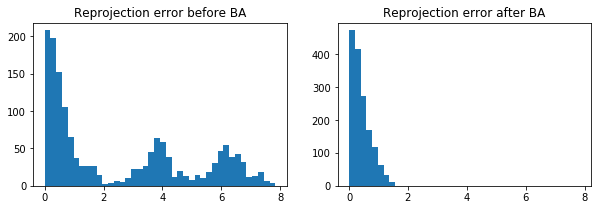

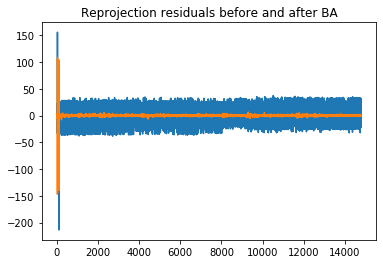

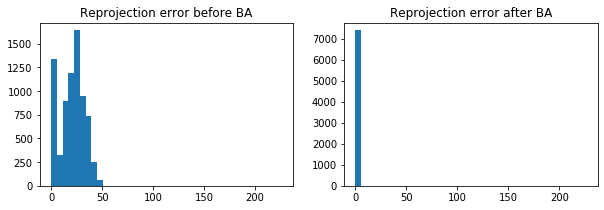

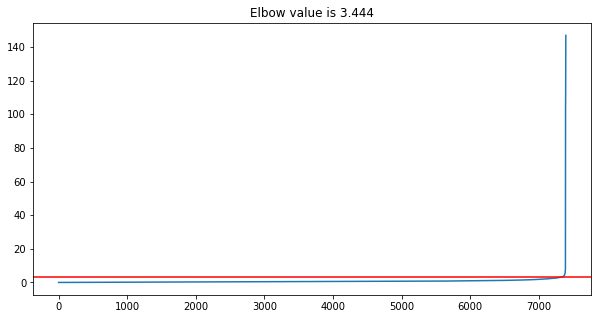


Removal of outliers according to reprojection error completed
Deleted 41 observations (0.55%) and 11 tracks (0.47%)
     - Obs per cam before : [727 580 365 348 621 214 569 561 880 702 441 251 583 555]
     - Obs per cam after  : [723 578 362 343 615 211 559 553 876 700 437 251 580 554]


Defining bundle adjustment parameters...
     - cam_params_to_optimize: ['R']

2343 3d points, 0 fixed and 2343 to be optimized
14 cameras, 5 fixed and 9 to be optimized
3 parameters to optimize per camera


Running bundle adjustment...
     - loss: linear
     - ftol: 0.0001
     - xtol: 1e-10

Shape of Jacobian sparsity: 14684x7071
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 2.0868e+06, final cost 2.2570e+03, first-order optimality 2.89e+04.
Optimization took 1 seconds

Error before BA (mean / median): 20.50 / 22.42
Error after  BA (mean / median): 0.62 / 0.49


Bundle adjusted projection matrices successfully saved at exp/coal/ba_sequential/P_adj


Bundle adjust

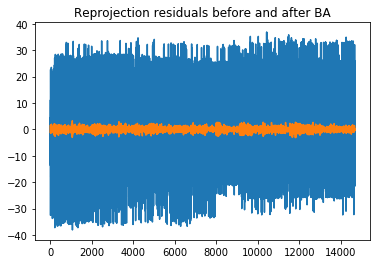

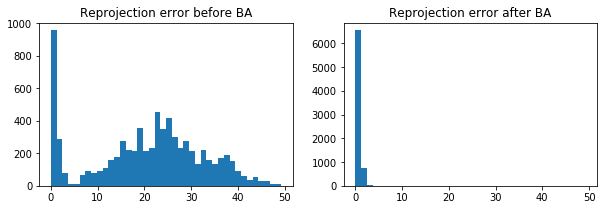

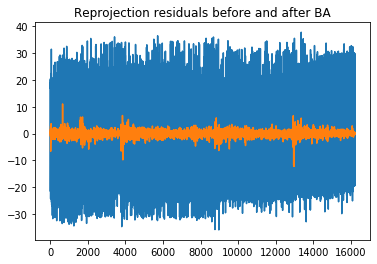

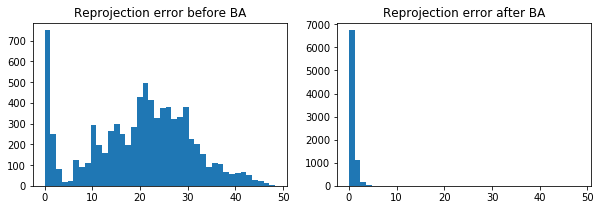

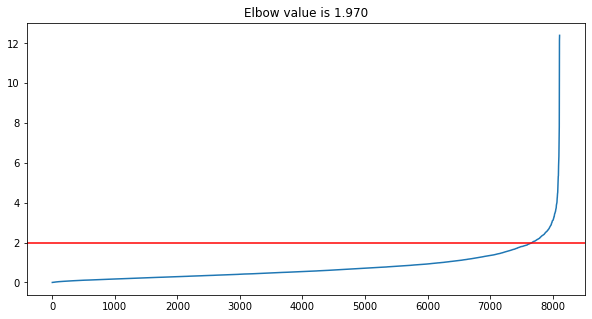


Removal of outliers according to reprojection error completed
Deleted 443 observations (5.46%) and 89 tracks (3.73%)
     - Obs per cam before : [ 82 448 374 773 562 294 190 516 446 368 606 809 911 431 753 549]
     - Obs per cam after  : [ 77 385 323 722 541 286 177 490 415 329 545 760 841 413 703 524]


Defining bundle adjustment parameters...
     - cam_params_to_optimize: ['R']

2295 3d points, 0 fixed and 2295 to be optimized
16 cameras, 9 fixed and 7 to be optimized
3 parameters to optimize per camera


Running bundle adjustment...
     - loss: linear
     - ftol: 0.0001
     - xtol: 1e-10

Shape of Jacobian sparsity: 15062x6933
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 1.9275e+06, final cost 1.7461e+03, first-order optimality 2.62e+04.
Optimization took 0 seconds

Error before BA (mean / median): 19.85 / 21.14
Error after  BA (mean / median): 0.57 / 0.50


Bundle adjusted projection matrices successfully saved at exp/coal/ba_sequential/P_ad

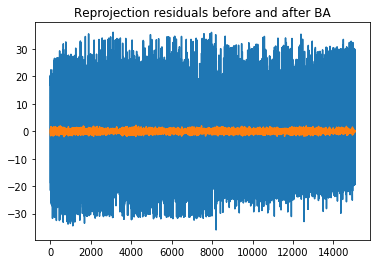

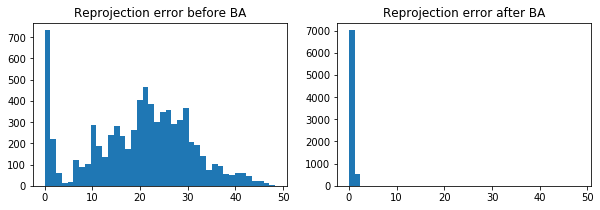

In [5]:
scene.run_sequential_bundle_adjustment(timeline_indices, n_previous=1, reset=True, verbose=True)

In [ ]:
scene.run_global_bundle_adjustment(timeline_indices, reset=True, verbose=True)

#scene.timeline_instances_diagram(timeline_indices, scene.ba_pipeline, neighbors=1)
#scene.compare_timeline_instances([0], [3], scene.ba_pipeline)

In [ ]:
scene.tracks_config['L2'] = True
scene.tracks_config['verbose local'] = False

scene.run_out_of_core_bundle_adjustment(timeline_indices, reset=True, verbose=True,
                                        parallelize=False, tie_points=False)

In [ ]:
scene.ba_pipeline.visualize_feature_track()

In [ ]:
scene.ba_pipeline.analyse_reproj_err_particular_image(1, plot=True)

In [ ]:
scene.display_crops()

In [ ]:
from feature_tracks import ft_utils

ft_utils.plot_features_stereo_pair(0, 1, scene.ba_pipeline.features, scene.ba_pipeline.input_seq)

In [ ]:
from feature_tracks import ft_utils

ft_utils.plot_pairwise_matches_stereo_pair(1, 3, scene.ba_pipeline.features,
                                           scene.ba_pipeline.pairwise_matches, scene.ba_pipeline.input_seq)

In [ ]:
from feature_tracks import ft_utils

ft_utils.plot_track_observations_stereo_pair(0, 1, scene.ba_pipeline.C,  scene.ba_pipeline.input_seq)

In [ ]:
from bundle_adjust import ba_utils

ba_utils.plot_connectivity_graph(scene.ba_pipeline.C, 50, save_pgf=False)

ba_utils.plot_connectivity_graph(scene.ba_pipeline.C, 100, save_pgf=False)

In [ ]:
scene.display_crops()

In [ ]:
scene.ba_pipeline.visualize_feature_track()

In [ ]:
scene.ba_pipeline.save_feature_tracks_as_svg(scene.dst_dir)

In [ ]:
output_file = '../ames_test3/pairs_to_triangulate.txt'

with open(output_file, "w") as f:
    for pair in scene.ba_pipeline.pairs_to_triangulate:
        fname_i = '/ames_test3/' + ba_timeseries.get_id(scene.ba_pipeline.myimages[pair[0]]) + '.tif'
        fname_j = '/ames_test3/' + ba_timeseries.get_id(scene.ba_pipeline.myimages[pair[1]]) + '.tif'
        f.write('{} {}\n'.format(fname_i, fname_j))

print('done writing', output_file)

In [ ]:
rois_geojson = []
for x in scene.ba_pipeline.footprints:
    vertices = (np.array(x['poly'].boundary.coords.xy).T)[:-1,:]
    output_aoi = {'coordinates': [vertices.tolist()], 'type': 'Polygon'}
    output_aoi['center'] = np.mean(output_aoi['coordinates'][0][:4], axis=0).tolist()
    rois_geojson.append(output_aoi)

from IS18.utils import zonestring_from_lonlat
utm_zone = zonestring_from_lonlat(scene.aoi_lonlat['center'][0], scene.aoi_lonlat['center'][1])
aoi_from_image_footprints_utm = ba_utils.combine_aoi_borders(rois_geojson)
aoi_from_image_footprints_lonlat = ba_utils.utm_aoi_to_lonlat_aoi(aoi_from_image_footprints_utm, utm_zone)

ba_utils.display_rois_over_map([aoi_from_image_footprints_lonlat], zoom_factor = 14)

print('--lon-lat-limit <min_lon min_lat max_lon max_lat>')

lons = np.array(aoi_from_image_footprints_lonlat['coordinates'])[0][:,0]
lats = np.array(aoi_from_image_footprints_lonlat['coordinates'])[0][:,1]
min_lon, max_lon = min(lons), max(lons)
min_lat, max_lat = min(lats), max(lats)

print('--lon-lat-limit {:.6f} {:.6f} {:.6f} {:.6f}'.format(min_lon, min_lat, max_lon, max_lat))

# Reconstruct scene

### Compute s2p DSMs with corrected RPCs

In [ ]:
test = scene.ba_pipeline.pts_3d_ba.copy()

from bundle_adjust import ba_utils
lat, lon, alt = ba_utils.ecef_to_latlon_custom(test[:,0], test[:,1], test[:,2])

lat_max, lat_min = np.percentile(lat, 95), np.percentile(lat, 5)
lon_max, lon_min = np.percentile(lon, 95), np.percentile(lon, 5)
alt_max, alt_min = np.percentile(alt, 95), np.percentile(alt, 5)

print('lat max-min:', lat_max, lat_min)
print('lon max-min:', lon_max, lon_min)
print('alt max-min:', alt_max, alt_min)

In [6]:
#ba_method = 'ba_global'
ba_method = 'ba_sequential'

for t_idx in timeline_indices:
    scene.reconstruct_date(t_idx, ba_method, verbose=False)


###################################################################################
Reconstructing scene at time 2019-06-08 07:53:52
Number of dsms to compute: 4
Output directory: exp/coal/ba_sequential/4D
Timeline id: 20190608_075352
###################################################################################

Running s2p...

Computed 4 dsms / 4 (0 err)

Merging dsms...

Done!



###################################################################################
Reconstructing scene at time 2019-06-17 07:51:38
Number of dsms to compute: 10
Output directory: exp/coal/ba_sequential/4D
Timeline id: 20190617_075138
###################################################################################

Running s2p...

Computed 10 dsms / 10 (0 err)

Merging dsms...

Done!



###################################################################################
Reconstructing scene at time 2019-06-27 07:48:21
Number of dsms to compute: 8
Output directory: exp/coal/ba_sequential/4D
Timeline

In [ ]:
scene.project_pts3d_adj_onto_dsms(timeline_indices, ba_method)

In [ ]:
scene.close_small_holes(timeline_indices, ba_method, imscript_bin_dir='bin')

In [ ]:
scene.compute_stat_per_date(timeline_indices, ba_method, stat='avg', use_cdsms=True)

In [ ]:
scene.compute_3D_statistics_over_time(timeline_indices, ba_method)

In [ ]:
x = np.array([2.3, 6.1, 0.3, 7.8])

In [ ]:
np.std(x)

In [ ]:
np.sqrt(np.mean(x**2) - np.mean(x)**2)